In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def generate_adj(alphas,thetas):
    num_nodes = len(alphas)
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            norm_diff = np.linalg.norm(thetas[i] - thetas[j])**2
            m_ij = alphas[i] + alphas[j] - norm_diff
            adjacency_matrix[i][j] = np.random.binomial(1, sigmoid(m_ij))
            adjacency_matrix[j][i] = adjacency_matrix[i][j]
    return adjacency_matrix

def distance_matrix(point_theta):
    n = point_theta.shape[0]
    distances = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            dist = np.linalg.norm(point_theta[i] - point_theta[j])**2
            distances[i, j] = dist
            distances[j, i] = dist
    return distances

def generate_M_matrix(alphas, thetas):
    num_nodes = len(alphas)
    M = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            norm_squared = np.linalg.norm(thetas[i] - thetas[j]) ** 2
            M[i][j] = alphas[i] + alphas[j] - norm_squared
            M[j][i] = M[i][j]
    return M

def f(A, alphas, thetas):
    M = generate_M_matrix(alphas, thetas)
    num_nodes = A.shape[0]
    result = 0
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                sigmoid_M = sigmoid(M[i][j])
                result += A[i][j] * M[i][j] + np.log(1 - sigmoid_M)
    return result

def Projection(X,C):
    return X if np.linalg.norm(X) < C else C*X/np.linalg.norm(X)

def gradient_theta(A, alphas, thetas):
    num_nodes = len(alphas)
    gradient = np.zeros_like(thetas)

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                norm_squared = np.linalg.norm(thetas[i] - thetas[j]) ** 2
                exp_term = np.exp(alphas[i] + alphas[j] - norm_squared)
                # sigmoid_term = sigmoid(alphas[i] + alphas[j] - norm_squared)

                gradient[i] += -2 * A[i][j] * (thetas[i] - thetas[j]) + \
                                2 * (thetas[i] - thetas[j]) * exp_term / (1 + exp_term)
    return gradient

def gradient_alpha(A, alphas, thetas):
    num_nodes = len(alphas)
    gradient = np.zeros_like(alphas)
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                norm_squared = np.linalg.norm(thetas[i] - thetas[j]) ** 2
                exp_term = np.exp(alphas[i] + alphas[j] - norm_squared)
                # sigmoid_term = sigmoid(alphas[i] + alphas[j] - norm_squared)
                gradient[i] += A[i][j] - exp_term / (1 + exp_term)
    
    return gradient

In [53]:
1-np.exp(2)/(1+np.exp(2))

0.11920292202211757

In [51]:
adjacency_matrix

array([[0., 1.],
       [1., 0.]])

In [54]:
np.random.seed = 1
C = 10000
true_alpha = np.array([1,2])
true_theta = np.array([[1,1],[2,2]])
adjacency_matrix = generate_adj(true_alpha, true_theta)
distance_matrix_ = distance_matrix(true_theta)

pred_alpha = np.array([1.,1.])
pred_theta = np.array([[1.,1.],[1.,1.]])
logli = f(adjacency_matrix, pred_alpha, pred_theta)
prev_logli = logli

# Training loop
flag = True
iter = 0
learning_rate = 0.1  # Initialize learning rate

# list
avg_loss_theta = []
avg_loss_alpha = []
max_loss_theta = []
max_loss_alpha = []
logli_list = []

while flag:
    # 设置最大迭代次数
    grad_x = gradient_alpha(adjacency_matrix, pred_alpha, temp_theta)
    print(grad_x)
    temp_alpha = Projection(pred_alpha + learning_rate * grad_x, C)

    # Update theta
    grad_y = gradient_theta(adjacency_matrix, pred_alpha, pred_theta)
    temp_theta = Projection(pred_theta + learning_rate * grad_y, C)

    # Update alpha


    # Calculate new log likelihood
    temp_logli = f(adjacency_matrix, temp_alpha, temp_theta)
    

    # Check improvement in log likelihood
    if temp_logli - prev_logli < 0:
        # If log likelihood decreases, reduce learning rate without updating parameters
        learning_rate /= 5
    else:
        # If log likelihood improves, update parameters and reset learning rate
        iter += 1
        pred_theta = temp_theta
        pred_alpha = temp_alpha
        logli = temp_logli

        # plot
        diff_distance = distance_matrix_-distance_matrix(pred_theta)
        diff_alpha = true_alpha-pred_alpha
        avg_loss_theta.append(np.linalg.norm(diff_distance, ord='fro')**2/len(pred_theta)**2)
        max_loss_theta.append(np.abs(diff_distance).max())             
        avg_loss_alpha.append(np.linalg.norm(diff_alpha)**2/len(pred_alpha))
        max_loss_alpha.append(np.abs(diff_alpha).max())
        logli_list.append(logli)
        print(f'pred_alpha: {np.round(pred_alpha, 3)}, pred_theta: {np.round(pred_theta, 3)}, logli: {np.round(logli, 3)}, max_loss_theta: {np.round(max_loss_theta[-1], 3)}, max_loss_alpha: {np.round(max_loss_alpha[-1], 3)}')


        # Check for convergence
        if logli - prev_logli > 0 and (logli - prev_logli)/np.abs(prev_logli) < 0.0001:
            flag = False
        # Reset learning rate for the next iteration
        prev_logli = logli
        learning_rate = 0.01

[0.11920292 0.11920292]
pred_alpha: [1.012 1.012], pred_theta: [[1. 1.]
 [1. 1.]], logli: -0.248, max_loss_theta: 2.0, max_loss_alpha: 0.988
[0.11672245 0.11672245]
pred_alpha: [1.013 1.013], pred_theta: [[1. 1.]
 [1. 1.]], logli: -0.248, max_loss_theta: 2.0, max_loss_alpha: 0.987
[0.11648199 0.11648199]
pred_alpha: [1.014 1.014], pred_theta: [[1. 1.]
 [1. 1.]], logli: -0.247, max_loss_theta: 2.0, max_loss_alpha: 0.986
[0.11624245 0.11624245]
pred_alpha: [1.015 1.015], pred_theta: [[1. 1.]
 [1. 1.]], logli: -0.247, max_loss_theta: 2.0, max_loss_alpha: 0.985
[0.11600383 0.11600383]
pred_alpha: [1.017 1.017], pred_theta: [[1. 1.]
 [1. 1.]], logli: -0.246, max_loss_theta: 2.0, max_loss_alpha: 0.983
[0.11576613 0.11576613]
pred_alpha: [1.018 1.018], pred_theta: [[1. 1.]
 [1. 1.]], logli: -0.246, max_loss_theta: 2.0, max_loss_alpha: 0.982
[0.11552933 0.11552933]
pred_alpha: [1.019 1.019], pred_theta: [[1. 1.]
 [1. 1.]], logli: -0.245, max_loss_theta: 2.0, max_loss_alpha: 0.981
[0.11529344 0

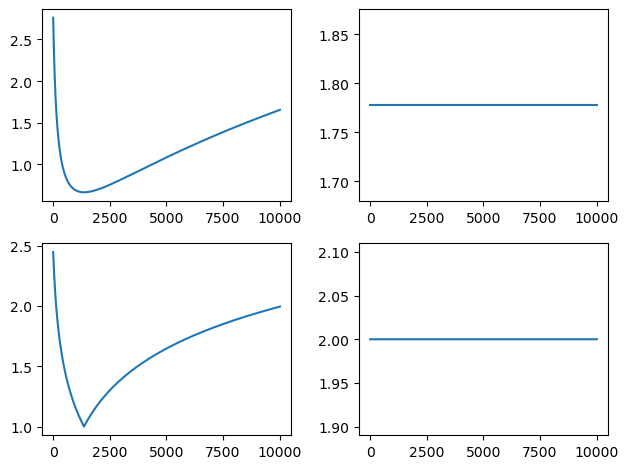

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 定义四个列表的数据
avg_loss_alpha, avg_loss_theta, max_loss_alpha, max_loss_theta

# 创建一个 2x2 的子图布局
fig, axs = plt.subplots(2, 2)

# 绘制每个子图的线图
axs[0, 0].plot(avg_loss_alpha)
axs[0, 1].plot(avg_loss_theta)
axs[1, 0].plot(max_loss_alpha)
axs[1, 1].plot(max_loss_theta)

# 调整子图的布局和样式
plt.tight_layout()

# 显示图形
plt.show()

In [ ]:
def main(num_samples, k, C, initial_learning_rate, tolerance):
    # Generate true parameters
    true_alpha = np.random.rand(num_samples)
    true_theta = np.random.uniform(-45*np.pi/161, 45*np.pi/161, num_samples*k).reshape(num_samples, -1)

    # Generate adjacency matrix
    adjacency_matrix = generate_adj(true_alpha, true_theta)

    # Generate distance matrix
    distance_matrix_ = distance_matrix(true_theta)

    # Initialize predicted parameters
    pred_alpha = np.random.rand(num_samples)
    pred_theta = np.random.uniform(-45*np.pi/161, 45*np.pi/161, num_samples*k).reshape(num_samples, -1)

    # Initial log likelihood
    logli = f(adjacency_matrix, pred_alpha, pred_theta)
    prev_logli = logli  # Initialize previous log likelihood

    # Training loop
    flag = True
    iter = 0
    learning_rate = initial_learning_rate  # Initialize learning rate

    # list
    avg_loss_theta = []
    avg_loss_alpha = []
    max_loss_theta = []
    max_loss_alpha = []
    logli_list = []

    while flag:
        # 设置最大迭代次数
        iter += 1
        if iter > 5:
            flag = False
        # Update theta
        grad_y = gradient_theta(adjacency_matrix, pred_alpha, pred_theta)
        temp_theta = Projection(pred_theta + learning_rate * grad_y, C)

        # Update alpha
        grad_x = gradient_alpha(adjacency_matrix, pred_alpha, temp_theta)
        temp_alpha = Projection(pred_alpha + learning_rate * grad_x, C)

        # Calculate new log likelihood
        temp_logli = f(adjacency_matrix, temp_alpha, temp_theta)
        print('prev_logli:',prev_logli)
        print('temp_logli:',temp_logli)
        
    
        # Check improvement in log likelihood
        if temp_logli - prev_logli < 0:
            # If log likelihood decreases, reduce learning rate without updating parameters
            learning_rate /= 5
        else:
            # If log likelihood improves, update parameters and reset learning rate
            # iter += 1
            pred_theta = temp_theta
            pred_alpha = temp_alpha
            logli = temp_logli
            print('logli:',logli)

            # plot
            diff_distance = distance_matrix_-distance_matrix(pred_theta)
            diff_alpha = true_alpha-pred_alpha
            avg_loss_theta.append(np.linalg.norm(diff_distance, ord='fro')**2/len(pred_theta)**2)
            max_loss_theta.append(np.abs(diff_distance).max())             
            avg_loss_alpha.append(np.linalg.norm(diff_alpha)**2/len(pred_alpha))
            max_loss_alpha.append(np.abs(diff_alpha).max())
            logli_list.append(logli)

            # Check for convergence
            if logli - prev_logli > 0 and (logli - prev_logli)/np.abs(prev_logli) < tolerance:
                flag = False
            # Reset learning rate for the next iteration
            prev_logli = logli
            learning_rate = initial_learning_rate

    return avg_loss_alpha, avg_loss_theta, max_loss_alpha, max_loss_theta, logli_list

In [ ]:
# np.random.seed(1)
num_samples =  20
k = 2 
C = 10000
learning_rate  = 10/num_samples
tolerace = 0.0001

avg_loss_alpha, avg_loss_theta, max_loss_alpha, max_loss_theta, logli_list = main(num_samples, k, C, learning_rate, tolerace)
# avg_loss_alpha, avg_loss_theta, max_loss_alpha, max_loss_theta, logli_list = main(num_samples, k, C, learning_rate, learning_rate_)

prev_logli: -299.4603216452806
temp_logli: -3472.049073646188
prev_logli: -299.4603216452806
temp_logli: -242.4333532350423
logli: -242.4333532350423
prev_logli: -242.4333532350423
temp_logli: -487.6852334356947
prev_logli: -242.4333532350423
temp_logli: -218.29249166900456
logli: -218.29249166900456
prev_logli: -218.29249166900456
temp_logli: -329.17292588782885
prev_logli: -218.29249166900456
temp_logli: -197.12339560052132
logli: -197.12339560052132


In [ ]:
relative_errors = []

for i in range(1, len(logli_list)):
    relative_error = (logli_list[i] - logli_list[i-1])/abs(logli_list[i-1])
    relative_errors.append(relative_error)

print(relative_errors)

[0.09957731163596474, 0.09697583231851052]


In [ ]:
len(relative_errors)

2

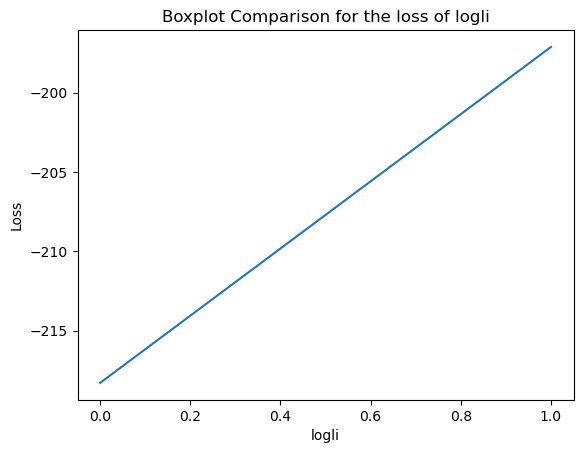

In [ ]:
plt.plot(logli_list[1:])
plt.title(fr'Boxplot Comparison for the loss of logli')
plt.xlabel('logli')
plt.ylabel('Loss')
plt.show()

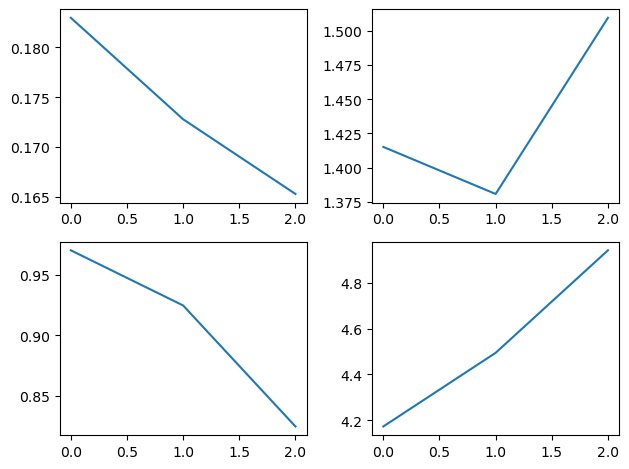

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 定义四个列表的数据
avg_loss_alpha, avg_loss_theta, max_loss_alpha, max_loss_theta

# 创建一个 2x2 的子图布局
fig, axs = plt.subplots(2, 2)

# 绘制每个子图的线图
axs[0, 0].plot(avg_loss_alpha)
axs[0, 1].plot(avg_loss_theta)
axs[1, 0].plot(max_loss_alpha)
axs[1, 1].plot(max_loss_theta)

# 调整子图的布局和样式
plt.tight_layout()

# 显示图形
plt.show()